In [1]:
import sys
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#make sure that opencv optimisation is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
- Use 'boat.jpg' as input.
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

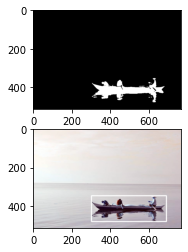

In [180]:
img = cv.imread('boat.jpg')
img_boat = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img_boat, (5, 5), 0)   # the third argument here is standard deviation
ret, result_boat = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

boat_copy = img.copy()
cv.rectangle(boat_copy, (303,346), (692,480), (255,255,255), 3 , cv.LINE_AA)

plt.subplot(2,1,1)
plt.imshow(result_boat, cmap = 'gray')

plt.subplot(2,1,2)
plt.imshow(boat_copy)
plt.show()

2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [181]:
img_leaf = cv.imread('leaf.jfif', 0)

def trackbar(x):
    kernel = np.ones((x,x), np.uint8)
    erosion = cv.erode(img_leaf, kernel, iterations = 1)
    
    cv.imshow('window', np.hstack([img_leaf,erosion]))

# cv.imshow('window', img)
cv.namedWindow('window')
cv.createTrackbar('kernel', 'window', 3, 5, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [108]:
def segment_porcelain(img): 
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV) 
     
    #set the blue color range in hsv color space 
    blue_low = (60, 5, 50)
    blue_high = (120, 200, 256)
     
    #apply the blue mask 
    mask = cv.inRange(hsv, blue_low, blue_high) 
     
    # AND operation to perform the segmentation 
    res = cv.bitwise_and(img, img, mask = mask) 
     
    #clean up the segmentation using nlur filter 
    blur = cv.GaussianBlur(res, (5, 5), 0) 
    return blur 

    
filename = "porcelain" 
 
porcelain_list = [] 
for i in range(1, 6): 
    img_porcelain = cv.resize(cv.imread(filename + str(i) + ".jfif"), (300,200)) 
    porcelain = cv.cvtColor(img_porcelain, cv.COLOR_BGR2RGB) 
    porcelain_list.append(porcelain) 
 
results = [segment_porcelain(porcelain) for porcelain in porcelain_list]

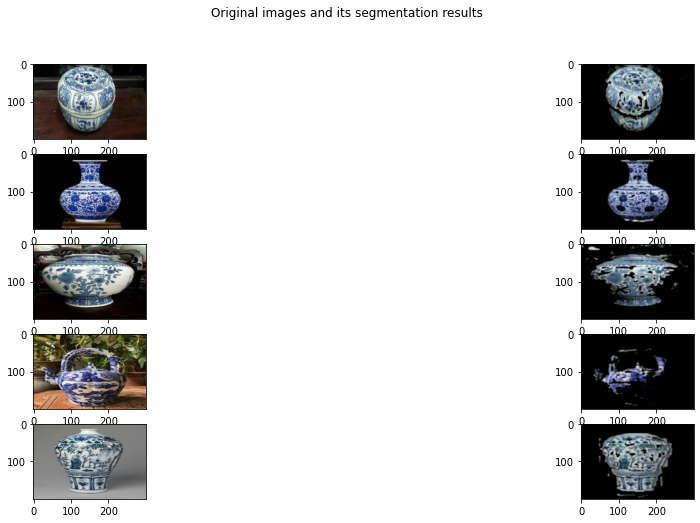

In [109]:
#Initiate a big figure 
#plt.figure(figsize = (18, 8)) 
 
f, ax = plt.subplots(5, 2, figsize = (18, 8)) 
 
for i in range(5): 
    ax[i][0].imshow(porcelain_list[i]) 
    ax[i][1].imshow(results[i]) 
     
f.suptitle("Original images and its segmentation results") 
plt.show()